# Assignment 1

# three_layer_neural_network.py

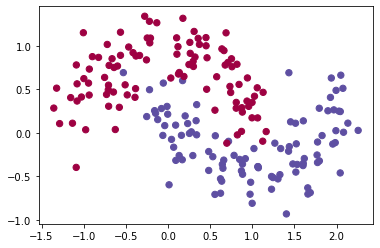

Loss after iteration 0: 0.086071
Accuracy after iteration 0: 0.820000
Loss after iteration 1000: 0.034012
Accuracy after iteration 1000: 0.990000
Loss after iteration 2000: 0.029193
Accuracy after iteration 2000: 0.985000
Loss after iteration 3000: 0.028173
Accuracy after iteration 3000: 0.985000
Loss after iteration 4000: 0.028079
Accuracy after iteration 4000: 0.985000
Loss after iteration 5000: 0.028225
Accuracy after iteration 5000: 0.985000
Loss after iteration 6000: 0.028469
Accuracy after iteration 6000: 0.985000
Loss after iteration 7000: 0.028795
Accuracy after iteration 7000: 0.985000
Loss after iteration 8000: 0.029025
Accuracy after iteration 8000: 0.990000
Loss after iteration 9000: 0.028610
Accuracy after iteration 9000: 0.990000
Loss after iteration 10000: 0.028281
Accuracy after iteration 10000: 0.990000
Loss after iteration 11000: 0.028012
Accuracy after iteration 11000: 0.990000
Loss after iteration 12000: 0.027788
Accuracy after iteration 12000: 0.990000
Loss after i

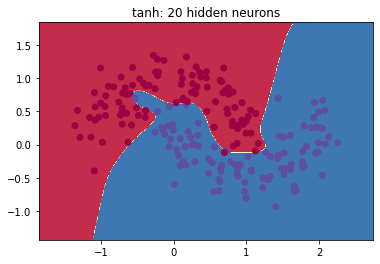

In [1]:
import numpy as np
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt

def generate_data():
    '''
    generate data
    :return: X: input data, y: given labels
    '''
    np.random.seed(0)
    X, y = datasets.make_moons(200, noise=0.20)
    return X, y

def plot_decision_boundary(pred_func, X, y):
    '''
    plot the decision boundary
    :param pred_func: function used to predict the label
    :param X: input data
    :param y: given labels
    :return:
    '''
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
    plt.show()

########################################################################################################################
########################################################################################################################
# YOUR ASSSIGMENT STARTS HERE
# FOLLOW THE INSTRUCTION BELOW TO BUILD AND TRAIN A 3-LAYER NEURAL NETWORK
########################################################################################################################
########################################################################################################################
class NeuralNetwork(object):
    """
    This class builds and trains a neural network
    """
    def __init__(self, nn_input_dim, nn_hidden_dim , nn_output_dim, actFun_type='tanh', reg_lambda=0.01, seed=0):
        '''
        :param nn_input_dim: input dimension
        :param nn_hidden_dim: the number of hidden units
        :param nn_output_dim: output dimension
        :param actFun_type: type of activation function. 3 options: 'tanh', 'sigmoid', 'relu'
        :param reg_lambda: regularization coefficient
        :param seed: random seed
        '''
        self.nn_input_dim = nn_input_dim
        self.nn_hidden_dim = nn_hidden_dim
        self.nn_output_dim = nn_output_dim
        self.actFun_type = actFun_type
        self.reg_lambda = reg_lambda
        
        # initialize the weights and biases in the network
        np.random.seed(seed)
        self.W1 = np.random.randn(self.nn_input_dim, self.nn_hidden_dim) / np.sqrt(self.nn_input_dim)
        self.b1 = np.zeros((1, self.nn_hidden_dim))
        self.W2 = np.random.randn(self.nn_hidden_dim, self.nn_output_dim) / np.sqrt(self.nn_hidden_dim)
        self.b2 = np.zeros((1, self.nn_output_dim))

    def actFun(self, z, actFun_type):
        '''
        actFun computes the activation functions
        :param z: net input
        :param type: Tanh, Sigmoid, or ReLU
        :return: activations
        '''

        # YOU IMPLEMENT YOUR actFun HERE
        if actFun_type.lower() == 'tanh':
            return np.tanh(z)
        
        if actFun_type.lower() == 'sigmoid':
            return 1 / (1 + np.exp(-z))
            
        if actFun_type.lower() == 'relu':
            return (z > 0) * z 
        
        if actFun_type.lower() == 'softmax':
            exp_scores = np.exp(z)
            return exp_scores / exp_scores.sum(axis=1, keepdims=True)

        return None

    def diff_actFun(self, z, actFun_type):
        '''
        diff_actFun computes the derivatives of the activation functions wrt the net input
        :param z: net input
        :param type: Tanh, Sigmoid, or ReLU
        :return: the derivatives of the activation functions wrt the net input
        '''

        # YOU IMPLEMENT YOUR diff_actFun HERE
        
        if actFun_type.lower() == 'tanh':
            return 1 - np.tanh(z)**2
            
        if actFun_type.lower() == 'sigmoid':
            s = 1 / (1 + np.exp(-z))
            return s * (1 - s)
            
        if actFun_type.lower() == 'relu':
            return z > 0
        
        if actFun_type.lower() == 'softmax':
            return z

        return None

    def feedforward(self, X, actFun):
        '''
        feedforward builds a 3-layer neural network and computes the two probabilities,
        one for class 0 and one for class 1
        :param X: input data
        :param actFun: activation function
        :return:
        '''

        # YOU IMPLEMENT YOUR feedforward HERE

        self.z1 = X.dot(self.W1) + self.b1 # np.dot(self.W1, X) + self.b1
        self.a1 = actFun(self.z1)
        self.z2 = self.a1.dot(self.W2) + self.b2 # np.dot(self.W2, a1) + self.b2
        exp_scores = np.exp(self.z2)
        self.probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
        return None

    def calculate_loss(self, X, y):
        '''
        calculate_loss computes the loss for prediction
        :param X: input data
        :param y: given labels
        :return: the loss for prediction
        '''
        num_examples = len(X)
        self.feedforward(X, lambda x: self.actFun(x, actFun_type=self.actFun_type))
        # Calculating the loss

        # YOU IMPLEMENT YOUR CALCULATION OF THE LOSS HERE

        data_loss = -np.log(self.probs.max(axis=1)).sum()

        # Add regulatization term to loss (optional)
        data_loss += self.reg_lambda / 2 * (np.sum(np.square(self.W1)) + np.sum(np.square(self.W2)))
        return (1. / num_examples) * data_loss

    def predict(self, X):
        '''
        predict infers the label of a given data point X
        :param X: input data
        :return: label inferred
        '''
        self.feedforward(X, lambda x: self.actFun(x, actFun_type=self.actFun_type))
        return np.argmax(self.probs, axis=1)

    def backprop(self, X, y):
        '''
        backprop implements backpropagation to compute the gradients used to update the parameters in the backward step
        :param X: input data
        :param y: given labels
        :return: dL/dW1, dL/b1, dL/dW2, dL/db2
        '''

        # IMPLEMENT YOUR BACKPROP HERE
        num_examples = len(X)
        delta3 = self.probs.copy()
        delta3[range(num_examples), y] -= 1
        
        self.dW2 = self.a1.T.dot(delta3)
        self.db2 = delta3.sum(axis=0, keepdims=True)
        
        self.dz1 = self.diff_actFun(self.z1, self.actFun_type) * delta3.dot(self.W2.T)
        
        self.dW1 = X.T.dot(self.dz1)
        self.db1 = self.dz1.sum(axis=0, keepdims=True)
        
        return self.dW1, self.dW2, self.db1, self.db2

    def fit_model(self, X, y, epsilon=0.01, num_passes=20000, print_loss=True):
        '''
        fit_model uses backpropagation to train the network
        :param X: input data
        :param y: given labels
        :param num_passes: the number of times that the algorithm runs through the whole dataset
        :param print_loss: print the loss or not
        :return:
        '''
        # Gradient descent.
        for i in range(0, num_passes):
            # Forward propagation
            self.feedforward(X, lambda x: self.actFun(x, actFun_type=self.actFun_type))
            # Backpropagation
            dW1, dW2, db1, db2 = self.backprop(X, y)

            # Add regularization terms (b1 and b2 don't have regularization terms)
            dW2 += self.reg_lambda * self.W2
            dW1 += self.reg_lambda * self.W1

            # Gradient descent parameter update
            self.W1 += -epsilon * dW1
            self.b1 += -epsilon * db1
            self.W2 += -epsilon * dW2
            self.b2 += -epsilon * db2

            # Optionally print the loss.
            # This is expensive because it uses the whole dataset, so we don't want to do it too often.
            if print_loss and i % 1000 == 0:
                print("Loss after iteration %i: %f" % (i, self.calculate_loss(X, y)))
                print("Accuracy after iteration %i: %f" % (i, (self.probs.argmax(axis=1) == y).sum() / len(y)))

    def visualize_decision_boundary(self, X, y):
        '''
        visualize_decision_boundary plots the decision boundary created by the trained network
        :param X: input data
        :param y: given labels
        :return:
        '''
        plot_decision_boundary(lambda x: self.predict(x), X, y)


if __name__ == "__main__":
    # generate and visualize Make-Moons dataset
    X, y = generate_data()
    plt.scatter(X[:, 0], X[:, 1], s=40, c=y, cmap=plt.cm.Spectral)
    plt.show()

    actFun_type = 'tanh' 
    nn_hidden_dim = 20
    model = NeuralNetwork(nn_input_dim=2, nn_hidden_dim=nn_hidden_dim, nn_output_dim=2, actFun_type=actFun_type)
    model.fit_model(X,y)#, num_passes=10001)
    plt.title(f'{actFun_type}: {nn_hidden_dim} hidden neurons' )
    model.visualize_decision_boundary(X,y)

# n_layer_neural_network.py (additional code)

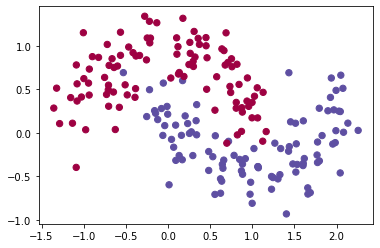

Loss after iteration 0: 0.035770
Accuracy after iteration 0: 0.500000
Loss after iteration 1000: 0.062479
Accuracy after iteration 1000: 0.965000
Loss after iteration 2000: 0.055128
Accuracy after iteration 2000: 0.975000
Loss after iteration 3000: 0.052283
Accuracy after iteration 3000: 0.985000
Loss after iteration 4000: 0.049734
Accuracy after iteration 4000: 0.985000
Loss after iteration 5000: 0.048762
Accuracy after iteration 5000: 0.985000
Loss after iteration 6000: 0.048465
Accuracy after iteration 6000: 0.985000
Loss after iteration 7000: 0.048353
Accuracy after iteration 7000: 0.985000
Loss after iteration 8000: 0.048287
Accuracy after iteration 8000: 0.985000
Loss after iteration 9000: 0.048229
Accuracy after iteration 9000: 0.985000
Loss after iteration 10000: 0.048170
Accuracy after iteration 10000: 0.985000


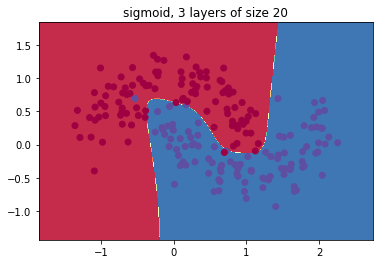

In [2]:
class DeepNeuralNetwork(NeuralNetwork):
    
    class Layer(object):
        def __init__(self, dnn_instance, nn_input_dim, nn_output_dim, actFun_type='tanh'):
            
            self.dnn_instance = dnn_instance
            
            self.nn_input_dim = nn_input_dim
            self.nn_output_dim = nn_output_dim
            self.actFun_type = actFun_type
            
            self.W = np.random.randn(self.nn_input_dim, self.nn_output_dim) / np.sqrt(self.nn_input_dim)
            self.b = np.zeros((1, self.nn_output_dim))
            
        def feedforward(self, X):
            self.z = X.dot(self.W) + self.b
            self.a = self.dnn_instance.actFun(self.z, self.actFun_type)
            
            return self.a
        
        def backprop(self, da, a_previous, dz=None):
            
            if dz is None:
                self.dz = self.dnn_instance.diff_actFun(self.z, self.actFun_type) * da
            else:
                self.dz = dz
            self.dW = a_previous.T.dot(self.dz)
            self.db = self.dz.sum(axis=0, keepdims=True) # / len(da)
            
            da_previous = self.dz.dot(self.W.T)
            
            return da_previous
                                               
        def step(self, epsilon, reg_lambda):
            
            self.dW += reg_lambda * self.W
            
            self.W -= epsilon * self.dW
            self.b -= epsilon * self.db
            
            return None
            
            
         
    
    """
    This class builds and trains a neural network
    """
    def __init__(self, nn_input_dim, nn_hidden_dim , nn_output_dim, n_layers, actFun_type='tanh', reg_lambda=0.01, seed=0):
        '''
        :param nn_input_dim: input dimension
        :param nn_hidden_dim: the number of hidden units (layer size)
        :param nn_output_dim: output dimension
        :param n_layers: number of layers
        :param actFun_type: type of activation function. 3 options: 'tanh', 'sigmoid', 'relu'
        :param reg_lambda: regularization coefficient
        :param seed: random seed
        '''
        self.nn_input_dim = nn_input_dim
        self.nn_hidden_dim = nn_hidden_dim
        self.nn_output_dim = nn_output_dim
        self.n_layers = n_layers
        self.actFun_type = actFun_type
        self.reg_lambda = reg_lambda
        
        # initialize the weights and biases in the network
        np.random.seed(seed)
        
        self.layers = []
        self.layers.append(self.Layer(self, nn_input_dim, nn_hidden_dim, actFun_type))
        for _ in range(n_layers - 3):
            self.layers.append(self.Layer(self, nn_hidden_dim, nn_hidden_dim, actFun_type))
        self.layers.append(self.Layer(self, nn_hidden_dim, nn_output_dim, 'softmax'))

    def feedforward(self, X):

        # YOU IMPLEMENT YOUR feedforward HERE
        
        self.activations = []
        
        activation = X
        
        for layer in self.layers:
            activation = layer.feedforward(activation)
            self.activations.append(activation)

        self.probs = activation
        return None

    def calculate_loss(self, X, y):
        '''
        calculate_loss computes the loss for prediction
        :param X: input data
        :param y: given labels
        :return: the loss for prediction
        '''
        num_examples = len(X)
        self.feedforward(X)
        # Calculating the loss

        # YOU IMPLEMENT YOUR CALCULATION OF THE LOSS HERE

        data_loss = -np.log(self.probs.max(axis=1)).sum()

        # Add regulatization term to loss (optional)
        data_loss += self.reg_lambda / 2 * np.sum([np.square(layer.W).sum() for layer in self.layers])
        return (1. / num_examples) * data_loss

    def predict(self, X):
        '''
        predict infers the label of a given data point X
        :param X: input data
        :return: label inferred
        '''
        self.feedforward(X)
        return np.argmax(self.probs, axis=1)

    def backprop(self, X, y):
        '''
        backprop implements backpropagation to compute the gradients used to update the parameters in the backward step
        :param X: input data
        :param y: given labels
        :return: dL/dW1, dL/b1, dL/dW2, dL/db2
        '''

        # IMPLEMENT YOUR BACKPROP HERE
        num_examples = len(X)
        delta3 = self.probs.copy()
        delta3[range(num_examples), y] -= 1
        
        da = self.layers[-1].backprop(da=None, a_previous=self.layers[-2].a, dz=delta3)
        
        # Iterate through [n_layers-3, n_layers-4, ... , 1]
        for i in np.arange(1, self.n_layers-2)[::-1]:
            da = self.layers[i].backprop(da=da, a_previous=self.layers[i-1].a)
            
        self.layers[0].backprop(da, X)
        
        return None

    def fit_model(self, X, y, epsilon=0.01, num_passes=20000, print_loss=True):
        '''
        fit_model uses backpropagation to train the network
        :param X: input data
        :param y: given labels
        :param num_passes: the number of times that the algorithm runs through the whole dataset
        :param print_loss: print the loss or not
        :return:
        '''
        # Gradient descent.
        for i in range(0, num_passes):
            # Forward propagation
            self.feedforward(X)
            # Backpropagation
            self.backprop(X, y)
            
            for layer in self.layers:
                layer.step(epsilon, self.reg_lambda)

            # Optionally print the loss.
            # This is expensive because it uses the whole dataset, so we don't want to do it too often.
            if print_loss and i % 1000 == 0:
                print("Loss after iteration %i: %f" % (i, self.calculate_loss(X, y)))
                print("Accuracy after iteration %i: %f" % (i, (self.probs.argmax(axis=1) == y).sum() / len(y)))

    def visualize_decision_boundary(self, X, y):
        '''
        visualize_decision_boundary plots the decision boundary created by the trained network
        :param X: input data
        :param y: given labels
        :return:
        '''
        plot_decision_boundary(lambda x: self.predict(x), X, y)


if __name__ == "__main__":
    # generate and visualize Make-Moons dataset
    X, y = generate_data()
    plt.scatter(X[:, 0], X[:, 1], s=40, c=y, cmap=plt.cm.Spectral)
    plt.show()

    actFun_type = 'sigmoid' 
    nn_hidden_dim = 20
    n_layers = 3
    model2 = DeepNeuralNetwork(nn_input_dim=2, nn_hidden_dim=nn_hidden_dim, nn_output_dim=2, n_layers=n_layers, actFun_type=actFun_type)
    model2.fit_model(X,y, num_passes=10001)
    plt.title(f'{actFun_type}, {n_layers} layers of size {nn_hidden_dim}') 
    model2.visualize_decision_boundary(X,y)

# New Dataset

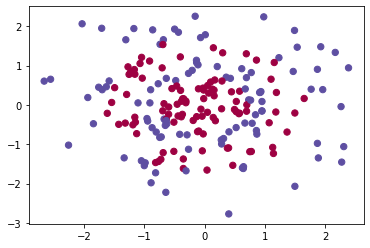

Loss after iteration 0: 0.026741
Accuracy after iteration 0: 0.565000
Loss after iteration 1000: 0.284984
Accuracy after iteration 1000: 0.765000
Loss after iteration 2000: 0.235691
Accuracy after iteration 2000: 0.775000
Loss after iteration 3000: 0.220095
Accuracy after iteration 3000: 0.765000
Loss after iteration 4000: 0.213900
Accuracy after iteration 4000: 0.800000
Loss after iteration 5000: 0.209143
Accuracy after iteration 5000: 0.800000
Loss after iteration 6000: 0.214431
Accuracy after iteration 6000: 0.810000
Loss after iteration 7000: 0.145466
Accuracy after iteration 7000: 0.860000
Loss after iteration 8000: 0.165968
Accuracy after iteration 8000: 0.840000
Loss after iteration 9000: 0.159415
Accuracy after iteration 9000: 0.900000
Loss after iteration 10000: 0.122906
Accuracy after iteration 10000: 0.860000


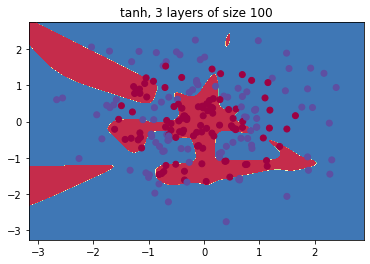

In [3]:
if __name__ == "__main__":
    # generate and visualize the new dataset
    #X, y = datasets.make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, random_state=9)
    #plt.scatter(X[:, 0], X[:, 1], s=40, c=y, cmap=plt.cm.Spectral)
    X, y = datasets.make_gaussian_quantiles(n_samples=200, n_classes=4, n_features=2, random_state=0)
    y = y % 2
    X
    plt.scatter(X[:, 0], X[:, 1], s=40, c=y, cmap=plt.cm.Spectral)
    plt.show()

    actFun_type = 'tanh' 
    nn_hidden_dim = 100
    n_layers = 3
    model2 = DeepNeuralNetwork(nn_input_dim=2, nn_hidden_dim=nn_hidden_dim, nn_output_dim=2, n_layers=n_layers, actFun_type=actFun_type)
    model2.fit_model(X,y, num_passes=10001)
    plt.title(f'{actFun_type}, {n_layers} layers of size {nn_hidden_dim}') 
    model2.visualize_decision_boundary(X,y)